In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('1_ITSM_cleansedFile.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35846 entries, 0 to 35845
Data columns (total 13 columns):
c_CI_Cat                        35846 non-null object
c_CI_Name                       35846 non-null object
c_CI_Subcat                     35846 non-null object
c_Closure_Code                  35846 non-null object
c_WBS                           35846 non-null object
q_No_of_Reassignments           35846 non-null int64
q_No_of_Related_Incidents       35846 non-null float64
q_No_of_Related_Interactions    35846 non-null float64
t_Close_Time                    35846 non-null object
t_Open_Time                     35846 non-null object
y_Priority                      35846 non-null int64
t_ReopenFlag                    35846 non-null float64
t_TicketWIPDurationDays         35846 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.6+ MB


In [4]:
df1.columns

Index(['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS',
       'q_No_of_Reassignments', 'q_No_of_Related_Incidents',
       'q_No_of_Related_Interactions', 't_Close_Time', 't_Open_Time',
       'y_Priority', 't_ReopenFlag', 't_TicketWIPDurationDays'],
      dtype='object')

In [5]:
lists=['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
stats=df1[lists].agg(['skew','kurtosis','std','mean','min','median','max'])
print(stats)

          q_No_of_Reassignments  q_No_of_Related_Incidents  \
skew                   4.691278                  50.551020   
kurtosis              38.303706                3771.437452   
std                    2.208733                   0.666176   
mean                   1.068264                   0.051024   
min                    0.000000                   0.000000   
median                 0.000000                   0.000000   
max                   46.000000                  63.000000   

          q_No_of_Related_Interactions  t_TicketWIPDurationDays  
skew                         90.888270                12.252646  
kurtosis                  10330.456008               222.604482  
std                           2.883947                19.670985  
mean                          1.158790                 5.120241  
min                           0.000000                 0.000000  
median                        1.000000                 0.737153  
max                         370.000000   

In [6]:
Counter(df1.y_Priority)

Counter({4: 22023, 3: 5068, 5: 8321, 2: 431, 1: 3})

# analyse CI category and sub category

y_Priority                 1       2        3        4        5
c_CI_Cat                                                       
Phone                 0.0000  0.0028   0.0028   0.0000   0.0000
application           0.0028  0.5300  10.8129  42.0131  14.6209
applicationcomponent  0.0000  0.0000   0.0084   0.0028   0.0000
computer              0.0000  0.4854   0.7839   1.6264   5.4623
database              0.0000  0.0000   0.4017   0.0446   0.0195
displaydevice         0.0000  0.0000   0.0000   0.4268   0.0279
hardware              0.0000  0.0167   0.3933   0.1116   0.4491
networkcomponents     0.0000  0.0558   0.0949   0.0753   0.0167
officeelectronics     0.0000  0.0000   0.1032   0.1813   0.1032
software              0.0000  0.0084   0.3655   0.3097   0.0586
storage               0.0000  0.0112   0.5133   0.9485   0.1506
subapplication        0.0056  0.0921   0.6584  15.6977   2.3043


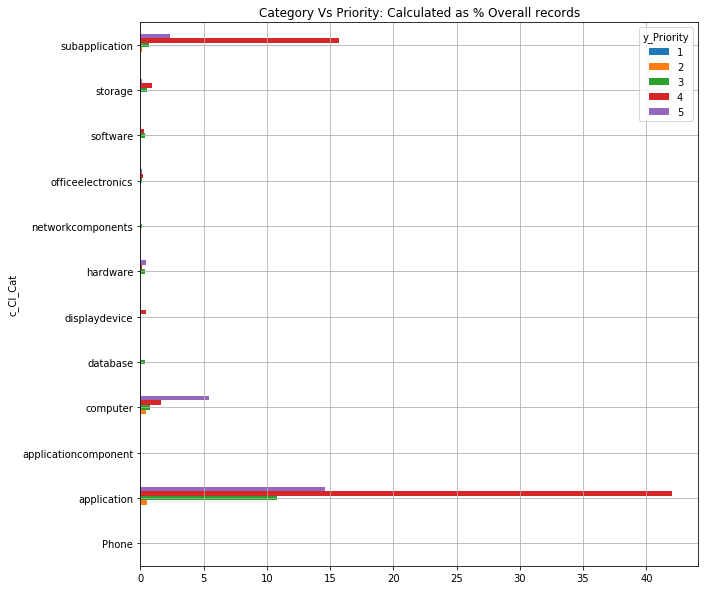

In [7]:
rcParams['figure.figsize']=10,10
draw_cat=pd.crosstab(df1.c_CI_Cat,df1.y_Priority,normalize='all').round(6)*100
print(draw_cat)
draw_cat.plot(kind='barh',grid=True,title="Category Vs Priority: Calculated as % Overall records")

# analyse closure code

y_Priority                           1         2         3         4         5
c_Closure_Code                                                                
Data                          0.000000  0.060325  0.044396  0.048404  0.017666
Hardware                      0.333333  0.257541  0.126677  0.022885  0.187958
No error - works as designed  0.000000  0.018561  0.051697  0.069745  0.075231
Operator error                0.000000  0.037123  0.029597  0.046270  0.022233
Other                         0.333333  0.329466  0.254144  0.322799  0.266314
Referred                      0.000000  0.006961  0.004341  0.003406  0.003245
Software                      0.333333  0.255220  0.244870  0.366253  0.317029
Unknown                       0.000000  0.016241  0.042818  0.033102  0.044586
User error                    0.000000  0.018561  0.185478  0.072924  0.035933
User manual not used          0.000000  0.000000  0.015983  0.014212  0.029804


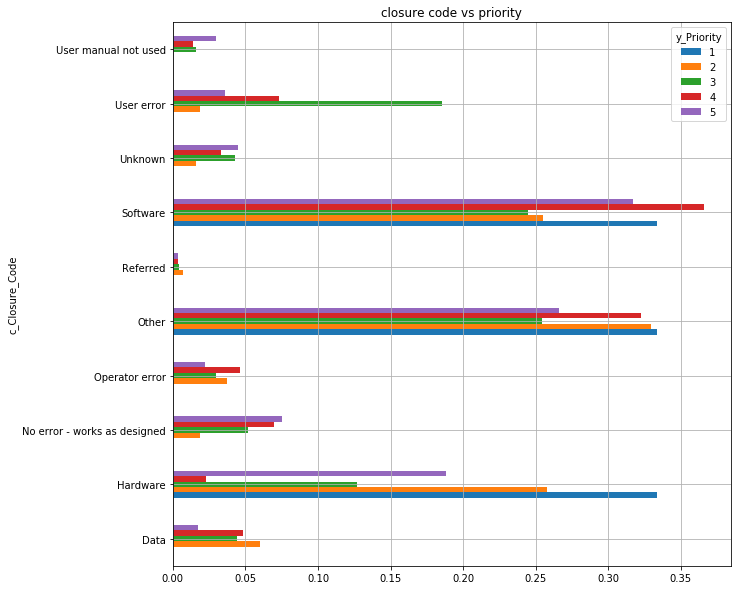

In [10]:
rcParams['figure.figsize']=10,10
crosstab_CC=pd.crosstab(df1.c_Closure_Code,df1.y_Priority,normalize='columns')
print(crosstab_CC)
crosstab_CC.plot(kind='barh',grid=True,title='closure code vs priority')

# analyse no of reassignments

y_Priority             1    2     3      4     5
q_No_of_Reassignments                           
0                      2  228  3260  13661  4607
1                      1  148   890   3611  1252
2                      0   28   419   1902  1017
3                      0   11   165   1031   492
4                      0    6   127    591   348
5                      0    3    56    386   149
6                      0    2    48    231   145
7                      0    0    27    169    83
8                      0    1    20    101    59
9                      0    2    11     89    30
10                     0    2    11     58    28
11                     0    0     8     46    24
12                     0    0     6     22    12
13                     0    0     3     24    18
14                     0    0     2     18    10
15                     0    0     2     22     9
16                     0    0     2      6     8
17                     0    0     2     16     5
18                  

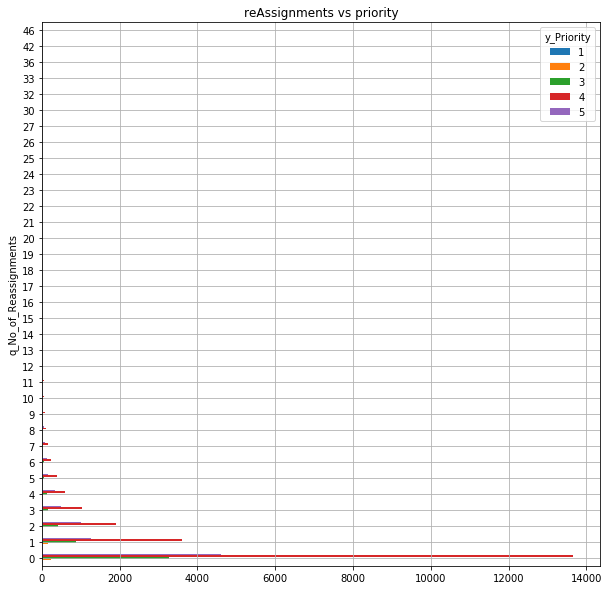

In [11]:
rcParams['figure.figsize']=10,10
crosstab_NR=pd.crosstab(df1.q_No_of_Reassignments,df1.y_Priority)
print(crosstab_NR)
crosstab_NR.plot(kind='barh',grid=True,title='reAssignments vs priority')

# analyse no of interactions with clients

y_Priority                    1    2     3      4     5
q_No_of_Related_Interactions                           
0.0                           0    0     4     40    68
1.0                           2  363  4704  20440  7630
2.0                           1   25   270   1236   518
3.0                           0    7    44    203    61
4.0                           0    5    17     41    30
5.0                           0    2     4     21     2
6.0                           0    4     6      5     0
7.0                           0    3     3      5     1
8.0                           0    2     1      2     1
9.0                           0    1     1      2     1
10.0                          0    1     2      0     0
11.0                          0    1     0      1     0
12.0                          0    3     0      2     0
13.0                          0    0     1      1     1
14.0                          0    1     0      1     0
15.0                          0    0     1      

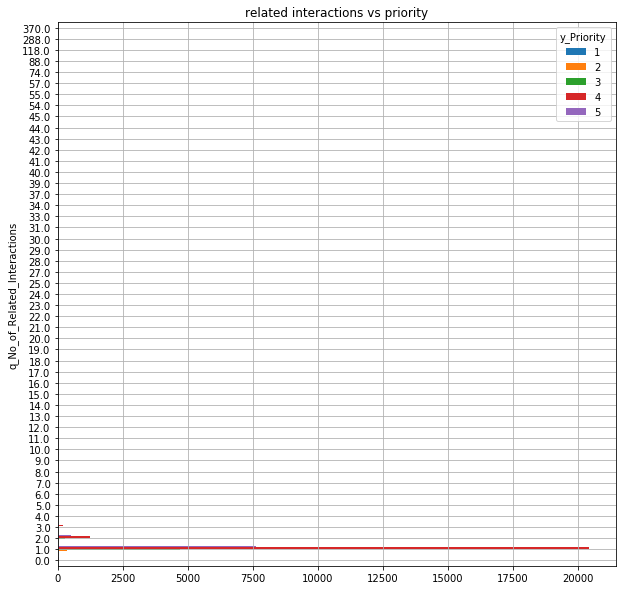

In [12]:
rcParams['figure.figsize']=10,10
crosstab_NI=pd.crosstab(df1.q_No_of_Related_Interactions,df1.y_Priority)
print(crosstab_NI)
crosstab_NI.plot(kind='barh',grid=True,title='related interactions vs priority')

In [15]:
df1=pd.read_csv('1_ITSM_cleansed_Encoded.csv')
df1.head()

,c_CI_Cat,c_Category,c_Closure_Code,c_WBS,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,t_Reopen_Flag,t_Reopen_Time,y_Priority
0,11,incident,4,126,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,0,NaN,3
1,1,incident,6,65,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,1,2013-12-02 12:31:00,2
2,1,incident,3,65,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,0,NaN,3
3,1,incident,4,65,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,0,NaN,3
4,1,incident,4,65,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,0,NaN,3


In [18]:
deleteColList=['c_Category']
df1.drop(deleteColList,inplace=True,axis=1)
df1=df1.sort_index(axis=1)
df1.head()

,c_CI_Cat,c_Closure_Code,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,t_Reopen_Flag,t_Reopen_Time,y_Priority
0,11,4,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,0,NaN,3
1,1,6,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,1,2013-12-02 12:31:00,2
2,1,3,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,0,NaN,3
3,1,4,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,0,NaN,3
4,1,4,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,0,NaN,3
